In [ ]:
# Importing DataScience libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm,skew
from scipy import stats
%matplotlib inline
from sklearn.linear_model import LinearRegression,Ridge,RidgeCV, ElasticNetCV, LassoCV,BayesianRidge
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler,StandardScaler,MinMaxScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split, GridSearchCV
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error

In [ ]:
# Uploading dataset
from google.colab import files
uploaded = files.upload()

Saving train.csv to train.csv


In [ ]:
# Reading csv file and making'Id' as Index
df_train = pd.read_csv('/content/train.csv',index_col = 'Id')

In [ ]:
# Let's look at the top few rows
df_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
# The rows and columns of our dataset
df_train.shape

(1460, 80)

In [ ]:
# Well we have to deal with plenty of attributes
df_train.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [ ]:
# Datatype of each attribute
df_train.dtypes

MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 80, dtype: object

In [ ]:
# Descriptive Statistics of Numerical Variables
df_train.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [ ]:
# Statistics of our Categorical variables
df_train.describe(include=['O'])

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,...,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,...,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,...,870,605,1311,1326,1340,3,157,49,1267,1198


In [ ]:
# Checking for the Missing values
# Using isnull fuction to count the total null values in each field
total = df_train.isnull().sum().sort_values(ascending=False)
# Percent of missing values is estimated by dividing total missing and the original total
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
# Concatenating the Total and Percent fields sing pandas concat fucntion
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
# Displays top 5 from our max sorted list
missing_data.head(5)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
MasVnrType,872,0.597260


In [ ]:
# Pandas fillna method to fill missing values with None
for col in ('PoolQC', 'MiscFeature', 'Alley', 'Fence','FireplaceQu'):
    df_train[col] = df_train[col].fillna('None')

In [ ]:
#Group by neighborhood and fill in missing value by the median LotFrontage of all the neighborhood
df_train["LotFrontage"] = df_train.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))

In [ ]:
# For loop to replace the missing data in the 4 attributes to None
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    df_train[col] = df_train[col].fillna('None')

In [ ]:
# Filling 0 for GarageYrBlt since it depicts No Garage for missing values
df_train['GarageYrBlt'] = df_train['GarageYrBlt'].fillna(0)

In [ ]:
# Filling with None since missing values means there is no Basement
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    df_train[col] = df_train[col].fillna('None')

In [ ]:
df_train["MasVnrType"] = df_train["MasVnrType"].fillna("None")
df_train["MasVnrArea"] = df_train["MasVnrArea"].fillna(0)

In [ ]:
df_train["Functional"] = df_train["Functional"].fillna("Typ")

In [ ]:
# Imputing the most occuring field for Electrical since mostly all houses have Electricity
df_train['Electrical'] = df_train['Electrical'].fillna(df_train['Electrical'].mode()[0])

In [ ]:
# Well! Things look better now!
df_train.isnull().sum().max()

0

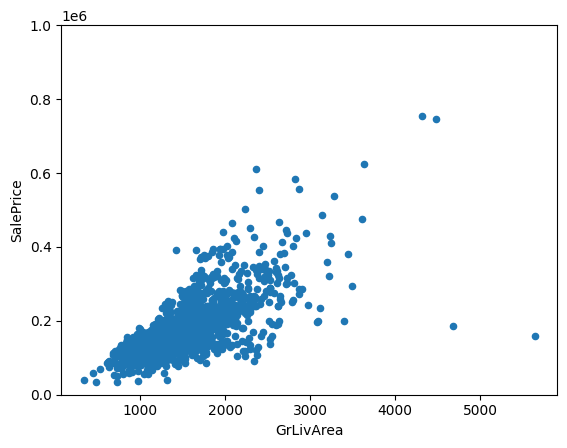

In [ ]:
#Scatterplot of Area(sq ft) and SalePrice
var = 'GrLivArea'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
# set ylimit to limit our data
data.plot.scatter(x=var, y='SalePrice', ylim=(0,1000000));

In [ ]:
#Sorted descending to pick the values of GrLivArea for them to drop it
df_train.sort_values(by = 'GrLivArea', ascending = False)[:2]
df_train = df_train.drop(df_train[df_train['GrLivArea'] == 5642].index)
df_train = df_train.drop(df_train[df_train['GrLivArea'] == 4676].index)

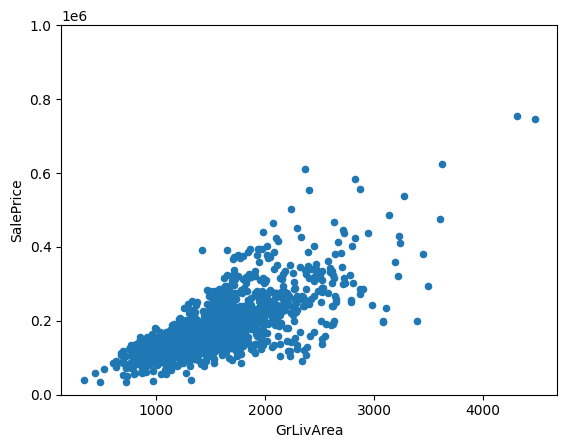

In [ ]:
# Rechecking the plot after outlier elimination
var = 'GrLivArea'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,1000000));

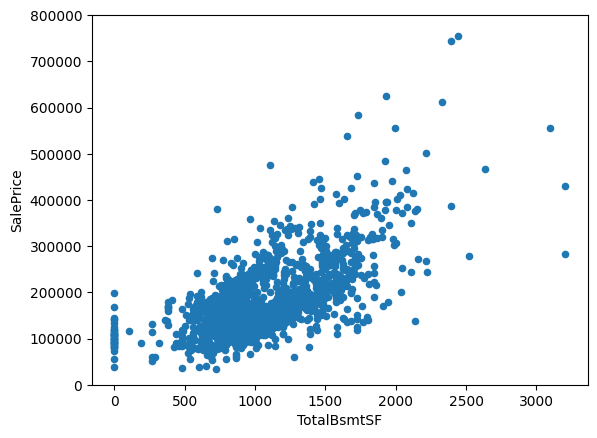

In [ ]:
# Total sq feet of Basement area and SalePrice comparison
var = 'TotalBsmtSF'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

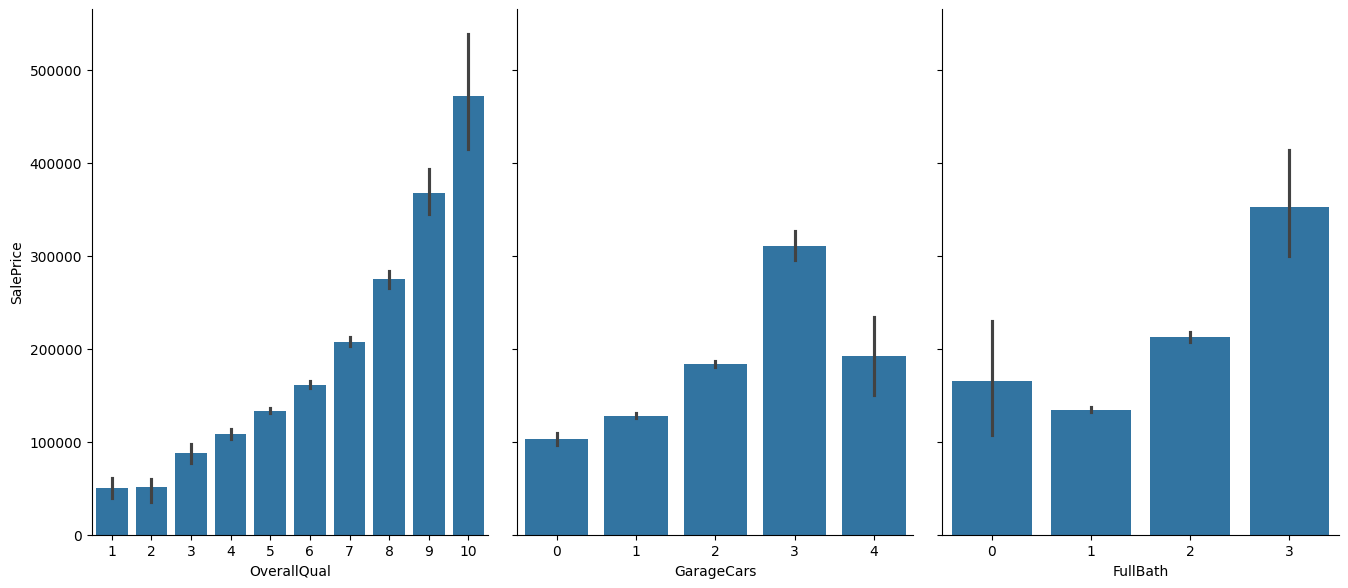

In [ ]:
#Let's look at some more variables which affect/influence the Target variable
g = sns.PairGrid(df_train,
                 x_vars=['OverallQual','GarageCars','FullBath'],
                 y_vars=["SalePrice"],
                 aspect=.75, height=6)
#plt.xticks(rotation=90)
g.map(sns.barplot, palette="coolwarm");

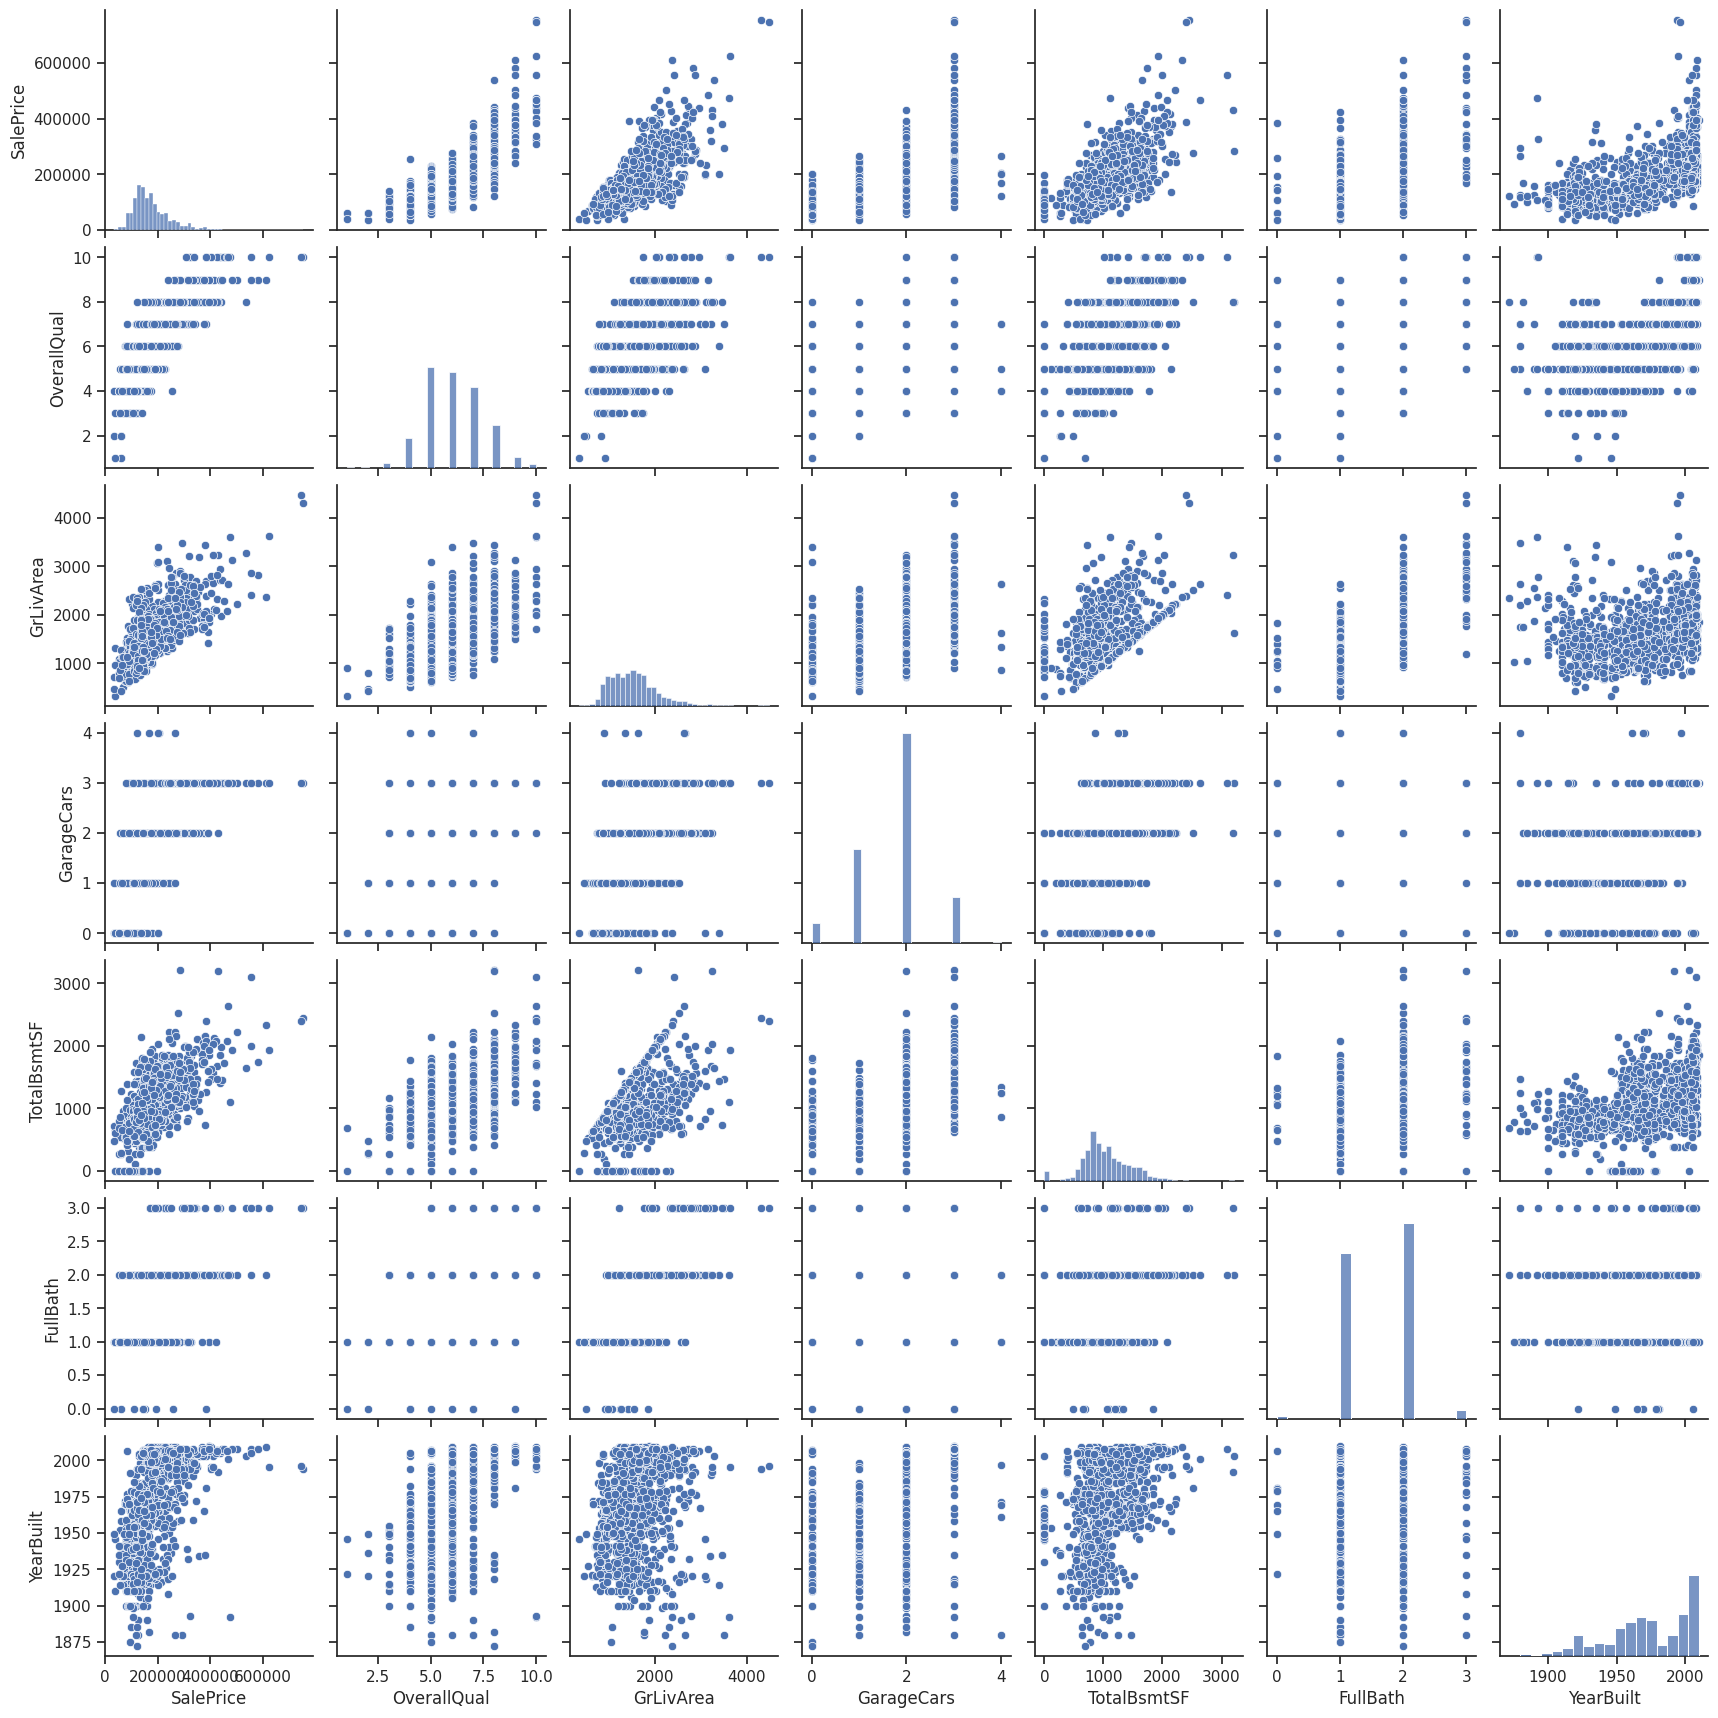

In [ ]:
# seaborn pairplot
sns.set(style= 'ticks')
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(df_train[cols], height = 2.5)
plt.show();

<ipython-input-31-5ee6eee0450b>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_train['SalePrice'],bins = 20);


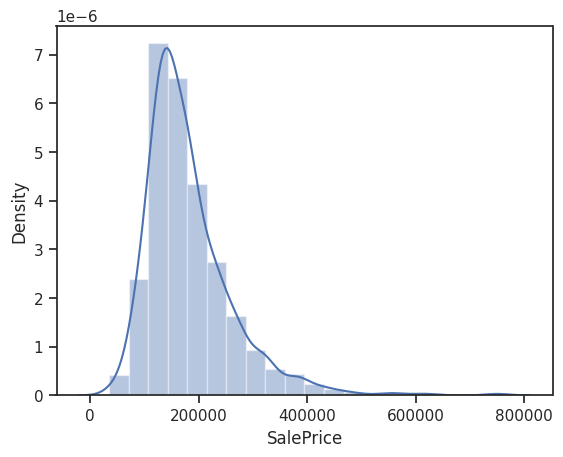

In [ ]:
# Using Seaborn to create a distplot with 20 bins
sns.distplot(df_train['SalePrice'],bins = 20);

<ipython-input-32-a6b28f60ac69>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_train['SalePrice'] , fit=norm);



 mu = 12.02 and sigma = 0.40



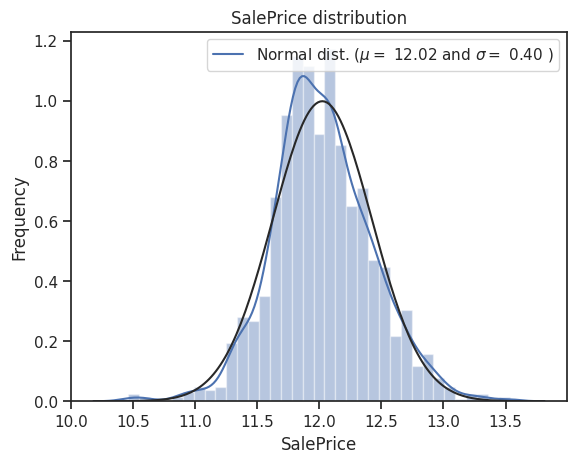

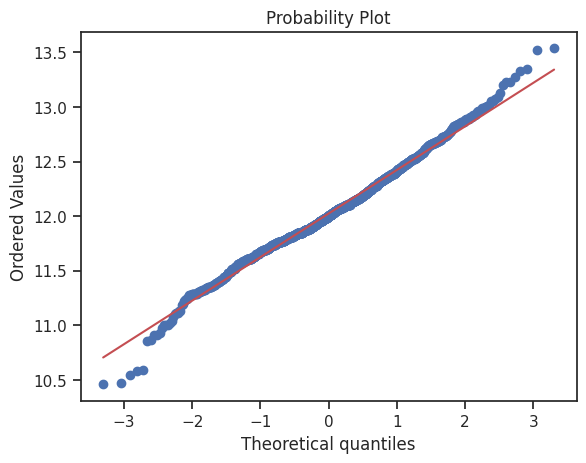

In [ ]:
#We use the numpy fuction log1p which  applies log(1+x) to all elements of the column
df_train["SalePrice"] = np.log1p(df_train["SalePrice"])

#Check the new distribution
sns.distplot(df_train['SalePrice'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(df_train['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(df_train['SalePrice'], plot=plt)
plt.show()

Correlation and HeatMap

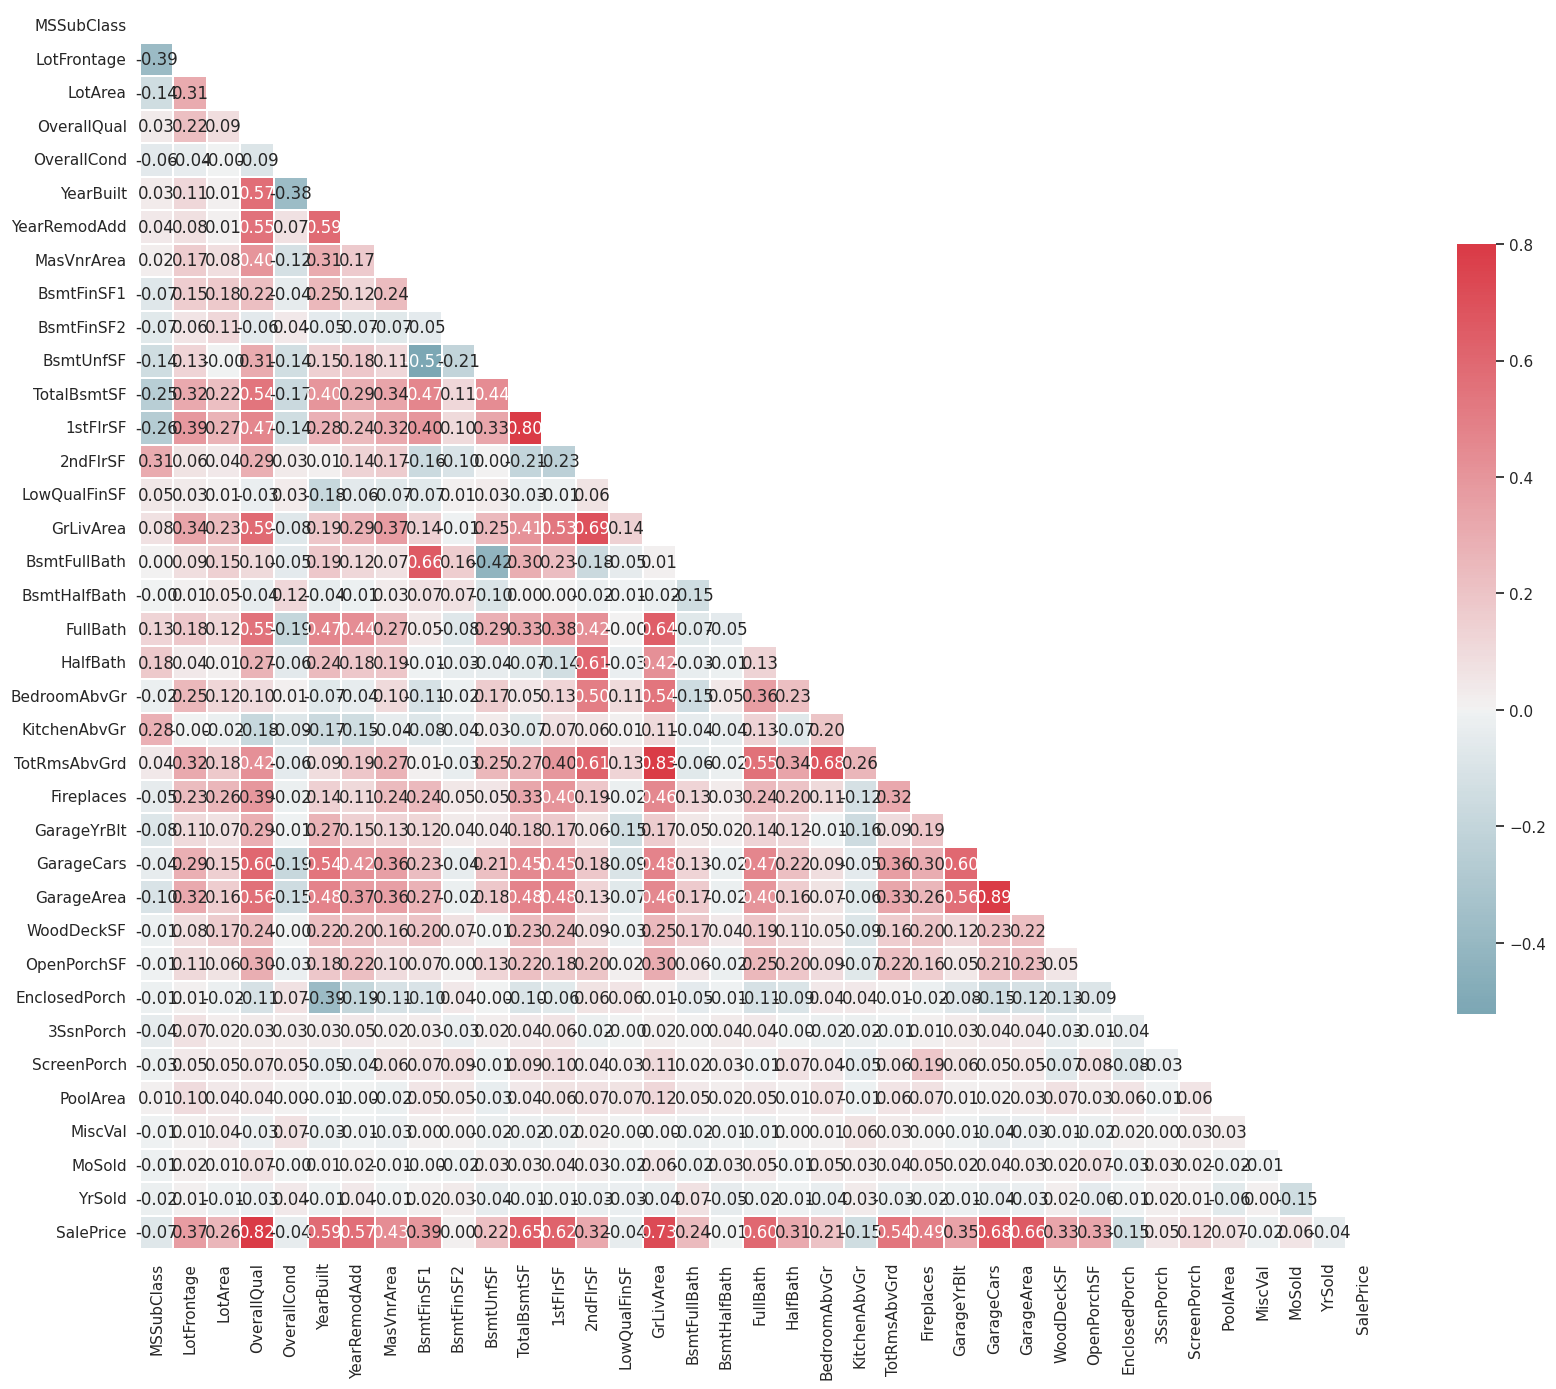

In [ ]:
# Filter the DataFrame to include only numeric columns
numeric_df_train = df_train.select_dtypes(include=[np.number])

# Calculate the correlation matrix
corr = numeric_df_train.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20, 20))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.8, center=0, annot=True, fmt='.2f',
            square=True, linewidths=.1, cbar_kws={"shrink": .5})

# Show the plot
plt.show()

Feature Engineering

In [ ]:
# Using datatype to seperate numerical features
numeric_feats = df_train.dtypes[df_train.dtypes != "object"].index

# Computing skewness using lambda function
skewed_feats = df_train[numeric_feats].apply(lambda x: skew(x.dropna()))
# Filtering highly skewed features
skewed_feats = skewed_feats[skewed_feats > 0.75]
skewed_feats = skewed_feats.index

In [ ]:
#Log transform to normalize skewed features
df_train[skewed_feats] = np.log1p(df_train[skewed_feats])

In [ ]:
# pandas get_dummies function to convert categorical values into binary
df_train = pd.get_dummies(df_train)

In [ ]:
# X array - drop target
X= df_train.drop(['SalePrice'],axis=1).values

In [ ]:
# y array - target only
y=df_train['SalePrice'].values

In [ ]:
# Split Train into Train and Validate Sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.20,random_state=42)

In [ ]:
# Size of our newly split datasets
print('Train size: %i' % X_train.shape[0])
print('Validation size: %i' % X_val.shape[0])

Train size: 1166
Validation size: 292


Cross Validation

In [ ]:
# No. of folds for Cross Validation
n_folds = 5
# Defining a function which returns the mean squared error between the cross validation score of X and y arrays
def rmse_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42)
    rmse = np.sqrt(-cross_val_score(model, X_train, y_train, scoring="neg_mean_squared_error", cv=kf))
    return (rmse)

In [ ]:
# Intialize the Cross Validation function with Shuffle
n_folds = 5
custom_cv = KFold(n_folds, shuffle=True, random_state=42)

Predictive Models

BASE MODEL : GRADIENT BOOSTING REGRESSOR

In [ ]:
#define  our  GB model
GBR = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10,
                                   loss='huber', random_state =5)

In [ ]:
#fitting the model on the train set
GBR.fit(X_train,y_train)

GradientBoostingRegressor(learning_rate=0.05, loss='huber', max_depth=4,
                          max_features='sqrt', min_samples_leaf=15,
                          min_samples_split=10, n_estimators=3000,
                          random_state=5)

In [ ]:
#Cross Validation Error
rmse_cv(GBR).mean()

0.1164913850481663

In [ ]:
# R squared, RMSE and Mean Absolute Error obtained by using actual and predicted values from Validate set
print('Validation R^2: %.5f'  % r2_score(y_val,GBR.predict(X_val)))
print('Validation RMSE: %.5f\n'   % mean_squared_error(y_val,GBR.predict(X_val)))
print('Validation Mean Absolute Error: %.5f\n'   % mean_absolute_error(y_val,GBR.predict(X_val)))

Validation R^2: 0.91069
Validation RMSE: 0.01506

Validation Mean Absolute Error: 0.08167



Ridge regression with built-in cross-validation.

In [ ]:
# ridgecv model
ridgecv = RidgeCV(alphas=[0.1, 1.0, 10.0],cv =custom_cv)

In [ ]:
#fitting our model on the training data
ridgecv.fit(X_train,y_train)

RidgeCV(alphas=[0.1, 1.0, 10.0],
        cv=KFold(n_splits=5, random_state=42, shuffle=True))

In [ ]:
# let's call our function to calculate the mean cross validation error
rmse_cv(ridgecv).mean()

0.11279364184220313

In [ ]:
# R- squared, RMSE and Mean Absolute Error for the validation sets
print('Validation R^2: %.5f'  % r2_score(y_val,ridgecv.predict(X_val)))
print('Validation RMSE: %.5f\n'   % mean_squared_error(y_val,ridgecv.predict(X_val)))
print('Validation Mean Absolute Error: %.5f\n'   % mean_absolute_error(y_val,ridgecv.predict(X_val)))

Validation R^2: 0.91508
Validation RMSE: 0.01431

Validation Mean Absolute Error: 0.08349



Kernel ridge regression (KRR)

In [ ]:
# kernel model
KRR = KernelRidge(alpha=5)

In [ ]:
# fitting on train
KRR.fit(X_train,y_train)

KernelRidge(alpha=5)

In [ ]:
#  model estimatores
print('Validation R^2: %.5f'  % r2_score(y_val,KRR.predict(X_val)))
print('Validation RMSE: %.5f\n'   % mean_squared_error(y_val,KRR.predict(X_val)))
print('Validation Mean Absolute Error: %.5f\n'   % mean_absolute_error(y_val,KRR.predict(X_val)))

Validation R^2: 0.91660
Validation RMSE: 0.01406

Validation Mean Absolute Error: 0.08308



In [ ]:
# CV error
rmse_cv(KRR).mean()

0.11253137389272254

LASSO WITH CV

In [ ]:
# define the model with alpha values in a numpy array with cross-validation function included
lasso = LassoCV(alphas = [1, 0.1, 0.001, 0.0005],cv =custom_cv)

In [ ]:
# fit the model
lasso.fit(X_train,y_train)

LassoCV(alphas=[1, 0.1, 0.001, 0.0005],
        cv=KFold(n_splits=5, random_state=42, shuffle=True))

In [ ]:
# Model scoring
print('Validation R^2: %.5f'  % r2_score(y_val,lasso.predict(X_val)))
print('Validation RMSE: %.5f\n'   % mean_squared_error(y_val,lasso.predict(X_val)))
print('Validation Mean Absolute Error: %.5f\n'   % mean_absolute_error(y_val,lasso.predict(X_val)))

Validation R^2: 0.92477
Validation RMSE: 0.01268

Validation Mean Absolute Error: 0.07891



In [ ]:
#CV error
rmse_cv(lasso).mean()

0.11248187400252985

ELASTIC NET WITH CV

In [ ]:
# defining the model with alphas and Elasticnet mixing parameter l1_ratio
Elastic = ElasticNetCV(alphas=[0.0001, 0.0005, 0.001, 0.01, 0.1, 1, 10], l1_ratio=[.01, .1, .5, .9, .99], max_iter=5000
                       ,cv=custom_cv)

In [ ]:
# fit the model
Elastic.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.8910728022248993, tolerance: 0.013770698505813028
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.4304336728614255, tolerance: 0.014624348168322457
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.4646769624672196, tolerance: 0.014998851906642569
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:617: Co

ElasticNetCV(alphas=[0.0001, 0.0005, 0.001, 0.01, 0.1, 1, 10],
             cv=KFold(n_splits=5, random_state=42, shuffle=True),
             l1_ratio=[0.01, 0.1, 0.5, 0.9, 0.99], max_iter=5000)

In [ ]:
# Model scores
print('Validation R^2: %.5f'  % r2_score(y_val,Elastic.predict(X_val)))
print('Validation RMSE: %.5f\n'   % mean_squared_error(y_val,Elastic.predict(X_val)))
print('Validation Mean Absolute Error: %.5f\n'   % mean_absolute_error(y_val,Elastic.predict(X_val)))

Validation R^2: 0.92451
Validation RMSE: 0.01273

Validation Mean Absolute Error: 0.07922



In [ ]:
# CV error
rmse_cv(Elastic).mean()

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.1203471478694595, tolerance: 0.010495465764880321
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.9773580070934746, tolerance: 0.011348244529754439
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.2288565722896725, tolerance: 0.011324140531676916
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:617: Co

0.11259553927917745

Pipeline with GridSearchCV

In [ ]:
# import pipeline
from sklearn.pipeline import Pipeline
# initialize pipeline with the model and here we have function which takes cares of outlier
GBRPipe = Pipeline([
        ('outlier', RobustScaler()),
        ('gbm', GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10,
                                   loss='huber', random_state =5))])

In [ ]:
# set up the parameter grid with parameters you like to iterate on. Here we have 3
param_grid = {'gbm__learning_rate': [0.01, 0.05],
             'gbm__max_depth': [1,5],
             'gbm__min_samples_leaf': [10, 15]}

In [ ]:
# setup gridsearchcv with estimator, param_grid
GBRGrid = GridSearchCV(estimator = GBRPipe,param_grid=param_grid)

In [ ]:
GBRGrid.fit(X_train,y_train)

KeyboardInterrupt: 

In [ ]:
rmse_cv(GBRGrid).mean()

KeyboardInterrupt: 

In [ ]:
print('Validation R^2: %.5f'  % r2_score(y_val,GBRGrid.predict(X_val)))
print('Validation RMSE: %.5f\n'   % mean_squared_error(y_val,GBRGrid.predict(X_val)))
print('Validation Mean Absolute Error: %.5f\n'   % mean_absolute_error(y_val,GBRGrid.predict(X_val)))

MODEL VALIDATION

We use the below three validators to pick our best model and in addition to that we have built a predictor function to determine the Cross Validation Error using neg_mean_squared_error scoring which also is one of our important evaluators.

**R-SQUARED**

R-squared is a statistical measure of how close the data are to the fitted regression line. It is also known as the coefficient of determination, or the coefficient of multiple determination for multiple regression.Best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse)

**RMSE (ROOT MEAN SQUARED ERROR)**

Root Mean Square Error (RMSE) measures how much error there is between two data sets. In other words, it compares a predicted value and an observed or actual value.It’s also known as Root Mean Square Deviation and is one of the most widely used statistic

**MEAN ABSOLUTE ERROR**

Mean absolute error (MAE) is a measure of difference between two continuous variables. Here X and y are arrays of paired observations that express the same phenomenon. Examples of Y versus X include comparisons of predicted versus actual and one technique of measurement versus an alternative technique of measurement.

BEST MODEL
The Best Model here is the LassoCV Regression which manages to produce a minimum cross validation error and highest R- squared and minimal RMSE and Mean Absolute Error. It performs so good that it overtakes even the Pipeline and GridSearch CV with hyperparameter function. But the point to note here which makes pipeline and Grid search so good is that it performs better with GBR when compared to GBR alone.

FURTHER
We can tune the hyperparameters further to match our best model and also add Pipeline and GridSearchCV to our models so that they include more features like outlier reduction,normalization, including more parameters and doing a grid search to find the best parameter value which brings out the best model.